Kaggle Link -- https://www.kaggle.com/datasets/uciml/adult-census-income

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',150)

In [3]:
df = pd.read_csv('D:\\Data Science\\Datasets\\Machine Learning\\Projects\\03_Adult_Census_Income.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.shape

(32561, 15)

In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
# Info for categorical features
df.describe(include=['O'])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(32537, 15)

In [11]:
df.replace('?', np.nan, inplace=True)

In [12]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [17]:
df.drop(columns=['education.num', 'fnlwgt'], inplace=True)

In [18]:
df.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [19]:
df.shape

(30139, 13)

In [20]:
df['income'] = df['income'].map({'<=50K' : 1,
                                 '>50K' : 0
                                })

In [21]:
df['income'].astype('int')

0        1
1        1
2        1
3        1
4        1
        ..
30134    1
30135    1
30136    0
30137    1
30138    1
Name: income, Length: 30139, dtype: int32

In [22]:
df['native.country'].value_counts()

native.country
United-States                 27487
Mexico                          606
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        61
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador      

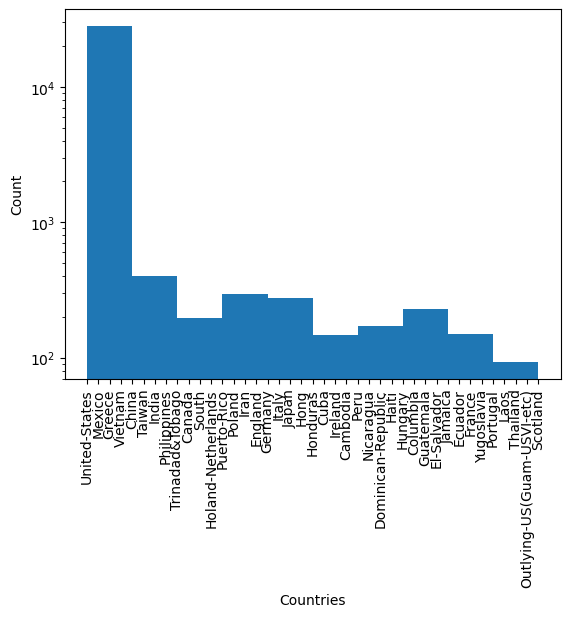

In [23]:
plt.hist(df['native.country'],log=True)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [24]:
country = df['native.country'].value_counts()

for index, value in country.items():
    #print(index)
    if value <=50:
        #print(value)
        test = df.loc[df['native.country'] == index, 'native.country'] = 'Others'
        print(test)

Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others
Others


In [25]:
df['native.country'].value_counts()

native.country
United-States         27487
Mexico                  606
Others                  486
Philippines             188
Germany                 128
Puerto-Rico             109
Canada                  107
El-Salvador             100
India                   100
Cuba                     92
England                  86
Jamaica                  80
South                    71
Italy                    68
China                    68
Dominican-Republic       67
Vietnam                  64
Guatemala                61
Japan                    59
Columbia                 56
Poland                   56
Name: count, dtype: int64

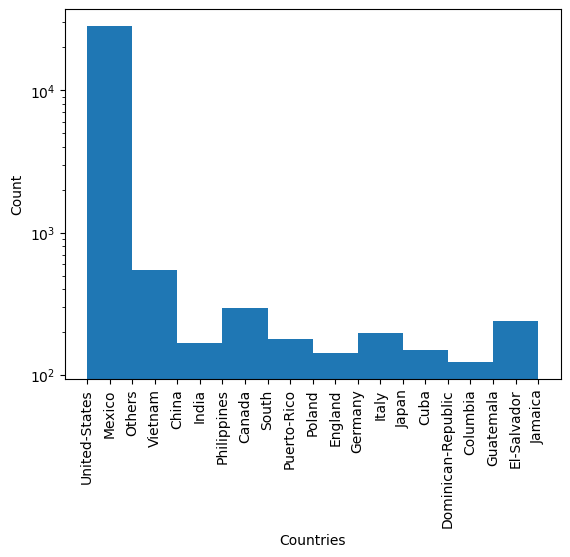

In [26]:
plt.hist(df['native.country'],log=True)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [27]:
df['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [28]:
df['workclass'] = df['workclass'].apply(lambda x: 1 if x == 'Private' else 0)

In [29]:
df.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,1,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,1
1,54,1,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,1
2,41,1,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,1
3,34,1,HS-grad,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,1
4,38,1,10th,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,1


In [30]:
df.reset_index(drop=True, inplace=True)

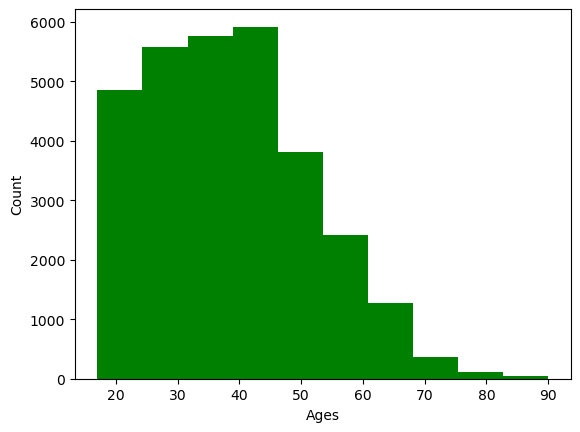

In [31]:
plt.hist(df['age'], color='green')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.show()

In [32]:
df.head(2)

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,1,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,1
1,54,1,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,1


In [33]:
df1 = pd.get_dummies(df, drop_first=True)

In [34]:
df1.tail()

,age,workclass,capital.gain,capital.loss,hours.per.week,income,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_El-Salvador,native.country_England,native.country_Germany,native.country_Guatemala,native.country_India,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Mexico,native.country_Others,native.country_Philippines,native.country_Poland,native.country_Puerto-Rico,native.country_South,native.country_United-States,native.country_Vietnam
30134,22,1,0,0,40,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
30135,27,1,0,0,38,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
30136,40,1,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
30137,58,1,0,0,40,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
30138,22,1,0,0,20,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [35]:
df1.reset_index(inplace=True)

In [36]:
X = df1.drop(columns=['income','index'])
X.head()

,age,workclass,capital.gain,capital.loss,hours.per.week,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_El-Salvador,native.country_England,native.country_Germany,native.country_Guatemala,native.country_India,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Mexico,native.country_Others,native.country_Philippines,native.country_Poland,native.country_Puerto-Rico,native.country_South,native.country_United-States,native.country_Vietnam
0,82,1,0,4356,18,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,54,1,0,3900,40,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,41,1,0,3900,40,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,34,1,0,3770,45,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,38,1,0,3770,40,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [37]:
y = df1['income']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
len(X_train), len(X_test)

(24111, 6028)

In [63]:
from sklearn.svm import SVC
svm = SVC()

In [64]:
svm.fit(X_train, y_train)

SVC()

In [65]:
svm.score(X_test, y_test)

0.8077305905773059

In [66]:
X_test.head()

,age,workclass,capital.gain,capital.loss,hours.per.week,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_El-Salvador,native.country_England,native.country_Germany,native.country_Guatemala,native.country_India,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Mexico,native.country_Others,native.country_Philippines,native.country_Poland,native.country_Puerto-Rico,native.country_South,native.country_United-States,native.country_Vietnam
4435,31,0,0,0,40,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
17216,41,0,0,0,40,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
18325,49,0,0,0,60,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
24716,19,1,0,0,30,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3847,41,1,1831,0,40,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [67]:
test = [31,0,0,0,40,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False]

In [68]:
test = np.array(test).reshape(1, -1)
test

array([[31,  0,  0,  0, 40,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0]])

In [69]:
svm.predict(test)

C:\Users\Ajith\anaconda3\envs\geo_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [70]:
y_test.head()

4435     1
17216    0
18325    1
24716    1
3847     1
Name: income, dtype: int64

In [48]:
## importing the require libraries of algorithms
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [51]:
# Defining  the model parameters for Grid parameters -- we used 3 models

model_params = {
#    'svm': {
#        'model': svm.SVC(gamma='auto'),
#        'params' : {
#            'C': [1,10,20],
#            'kernel': ['rbf','linear']
#        }  
#    },

    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,15,30,45]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [73]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.837668,{'n_estimators': 30}
1,logistic_regression,0.843267,{'C': 10}


In [74]:
model=RandomForestClassifier(n_estimators=45)

In [75]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=45)

In [76]:
model.score(X_test, y_test)

0.8422362309223623

In [77]:
model.predict(test)

C:\Users\Ajith\anaconda3\envs\geo_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [78]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Ajith\anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
lr.score(X_test, y_test)

0.8480424684804246

In [80]:
lr.predict(test)

C:\Users\Ajith\anaconda3\envs\geo_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)